# Herkunftsländer der Arbeitnehmer

In [1]:
import cleanup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('../own_style.mplstyle')


In [2]:
#cleanup.generate_cleaned_df()


In [3]:

col_list = ["country_of_citizenship"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)

<AxesSubplot:title={'center':'Number of Visa Applications by Country of Citizenship'}, xlabel='Country of Citizenship', ylabel='Number of Visa Applications'>

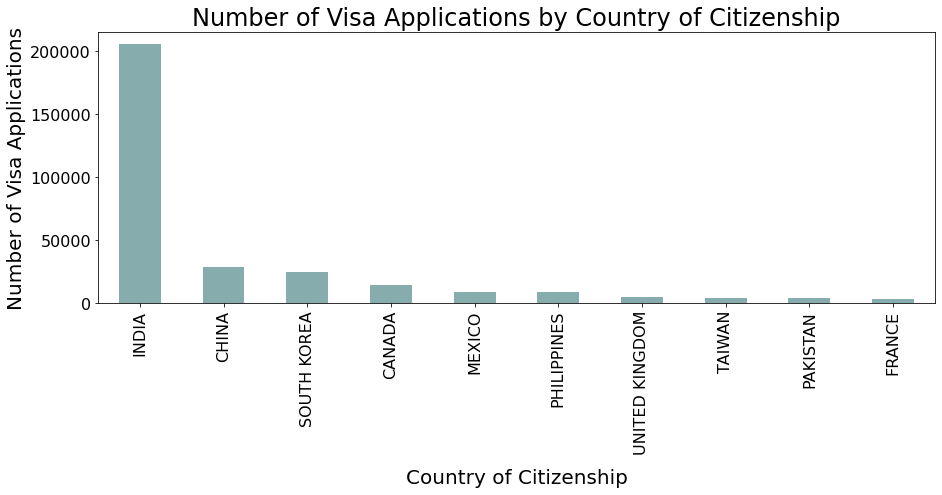

In [9]:
plt.xlabel("country_of_citizenship", labelpad=14)
visas_df['country_of_citizenship'].value_counts()[:10].plot(kind="bar", xlabel="Country of Citizenship", ylabel = "Number of Visa Applications", title = "Number of Visa Applications by Country of Citizenship", figsize = [15,5])




Ergebnis: Die meisten Arbeitnehmer kommen aus den folgenden Ländern:

- Indien
- China
- Süd Korea

## Anzeige als Weltkarte

In [5]:
# TODO: Darstellung als Weltkarte